<a href="https://colab.research.google.com/github/juancssantos/BOAS_PRATICAS_DADOS_MVP_PUC/blob/main/Analise_boas_patricas_MVP_PUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Juan Carlos da Silva Santos

**Matrícula:** 4052024001972

**Dataset:** [Data Science Salaries 2024](https://archive.ics.uci.edu/dataset/53/iris)

## Sobre o Conjunto de Dados
**Contexto**

No campo em constante evolução da ciência de dados, compreender as tendências e padrões salariais é crucial tanto para profissionais quanto para organizações. Este conjunto de dados tem como objetivo esclarecer o cenário dos salários em ciência de dados entre 2020 e 2024. Ao analisar esses dados, entusiastas, pesquisadores e profissionais do setor podem obter insights valiosos sobre:

Tendências salariais ao longo do tempo.

Variações regionais nos salários.

Fatores que influenciam a remuneração na área de ciência de dados.

**Conteúdo**

O dataset contém uma coleção abrangente de informações salariais em ciência de dados, cobrindo um período de cinco anos (2020 a 2024). Os dados incluem diversos aspectos relacionados a salários, oferecendo uma visão multifacetada sobre remuneração no setor.

**Estrutura do Dataset**

O conjunto de dados (data_science_salaries) contém as seguintes colunas:

**job_title:**	Cargo/função associado ao salário reportado.

**experience_level:**	Nível de experiência do profissional.

**employment_type:**	Tipo de contrato (tempo integral, meio período, etc.).

**work_models:**	Modelo de trabalho (remoto, presencial, híbrido).

**work_year:**	Ano em que a informação salarial foi registrada.

**employee_residence:**	Local de residência do funcionário.

**salary:**	Salário reportado na moeda original.

**salary_currency:**	Moeda em que o salário foi pago.

**salary_in_usd:**	Salário convertido para dólares americanos (USD).

**company_location:**	Localização geográfica da empresa contratante.

**company_size:**	Tamanho da empresa (classificado pelo número de funcionários).


# Configuração Inicial

In [76]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Configurações de estilo
plt.style.use('seaborn-v0_8')  # Estilo mais recente
sns.set_palette("husl")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')


# 1 Definição do Problema


## **Contexto**

A ciência de dados tem se tornado uma das áreas mais promissoras e bem remuneradas no mercado de trabalho atual. Com a crescente digitalização e dependência de dados, as empresas estão cada vez mais buscando profissionais qualificados para extrair insights valiosos de grandes volumes de informação.

## **Descrição do Problema**

Este conjunto de dados contém informações sobre salários na área de ciência de dados entre 2020 e 2024, abrangendo diversos fatores como:

Cargos específicos

Níveis de experiência

Tipos de emprego

Modelos de trabalho

Localizações geográficas

Tamanhos de empresas

## **Problema Central**

Como os salários em ciência de dados variam de acordo com diferentes fatores ao longo do tempo, e quais são as principais tendências e padrões observáveis?

## **Tipo de Análise**

Esta é uma análise exploratória de dados (EDA) que pode ser considerada como um problema de aprendizado não supervisionado, pois o objetivo principal é descobrir padrões, tendências e relações nos dados, sem um alvo específico para predição.

## **Premissas e Hipóteses**

Os salários em ciência de dados aumentaram significativamente entre 2020 e 2024

Profissionais com maior experiência recebem salários substancialmente mais altos

Empresas maiores tendem a pagar salários mais altos

Localizações geográficas específicas (como EUA) oferecem salários mais altos

Modelos de trabalho remoto se tornaram mais prevalentes após 2020

## **Restrições dos Dados**

Período limitado de 5 anos (2020-2024)

Dados coletados principalmente de uma fonte (ai-jobs.net)

Salários convertidos para USD podem não refletir completamente o poder de compra local

# 2 Carregamento e Primeira Visualização dos Dados

In [77]:
# Carregando os dados
df = pd.read_csv('https://raw.githubusercontent.com/juancssantos/BOAS_PRATICAS_DADOS_MVP_PUC/main/data_science_salaries.csv')


# Visualizando as primeiras linhas
print("Dimensões do dataset:", df.shape)
df.head()

Dimensões do dataset: (6599, 11)


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


# 3 Análise Descritiva Básica


In [78]:
# Informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [79]:
# Estatísticas descritivas para variáveis numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,6599.00,2022.82,0.67,2020.00,2023.00,2023.00,2023.00,2024.00
salary,6599.00,179283.26,526372.24,14000.00,96000.00,140000.00,187500.00,30400000.00
salary_in_usd,6599.00,145560.56,70946.84,15000.00,95000.00,138666.00,185000.00,750000.00


In [80]:
# Verificando valores ausentes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


In [81]:
#Para mostrar todos os números como floats sem notação científica
pd.set_option('display.float_format', lambda x: '%.6f' % x)

#4 Análise de Variáveis Individuais


## 4.1 Distribuição Temporal (work_year)


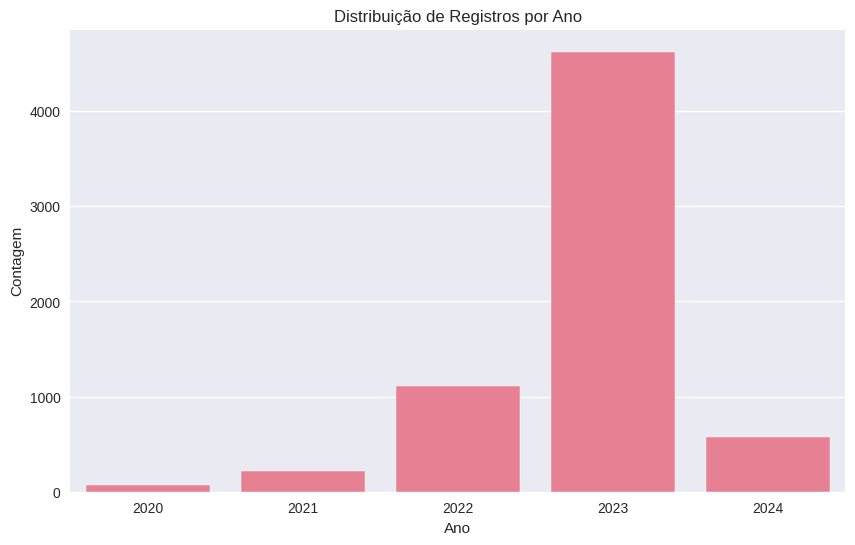

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='work_year', data=df, order=sorted(df['work_year'].unique()))
plt.title('Distribuição de Registros por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.show()

##4.2 Níveis de Experiência (experience_level)


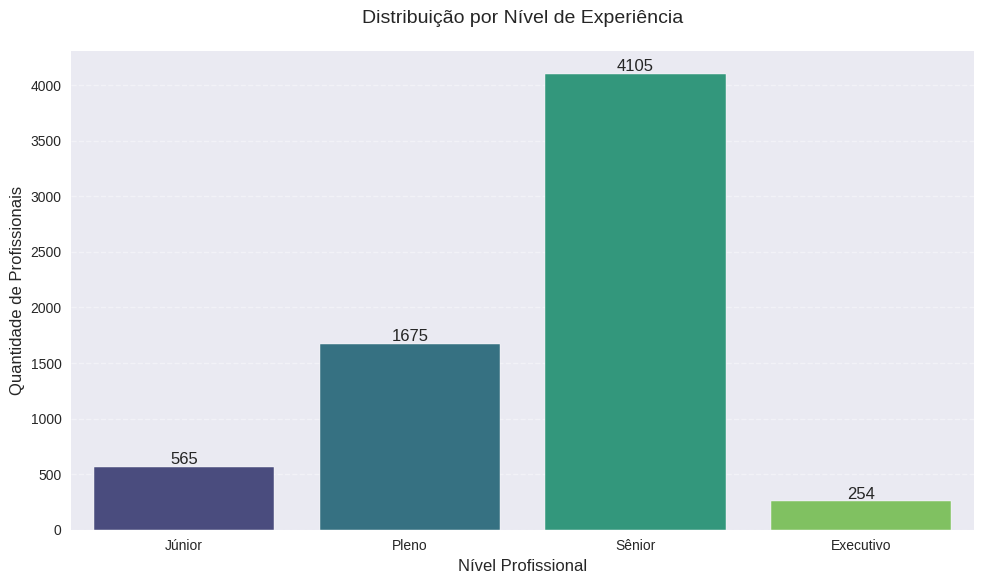

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para exibir gráficos
%matplotlib inline

# Mapeamento exato para seus dados
exp_level_map = {
    'Entry-level': 'Júnior',
    'Mid-level': 'Pleno',
    'Senior-level': 'Sênior',
    'Executive-level': 'Executivo'
}

# Aplicando o mapeamento
df['experience_level'] = df['experience_level'].map(exp_level_map)

# Ordem hierárquica correta
order_levels = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

# Criando a visualização
plt.figure(figsize=(10, 6))
sns.countplot(
    x='experience_level',
    data=df,
    order=order_levels,
    palette='viridis'
)

# Customização do gráfico
plt.title('Distribuição por Nível de Experiência', fontsize=14, pad=20)
plt.xlabel('Nível Profissional', fontsize=12)
plt.ylabel('Quantidade de Profissionais', fontsize=12)
plt.xticks(rotation=0)  # Removi a rotação para melhor legibilidade

# Adicionando rótulos de dados
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width()/2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## 4.3 Tipos de Emprego (employment_type)


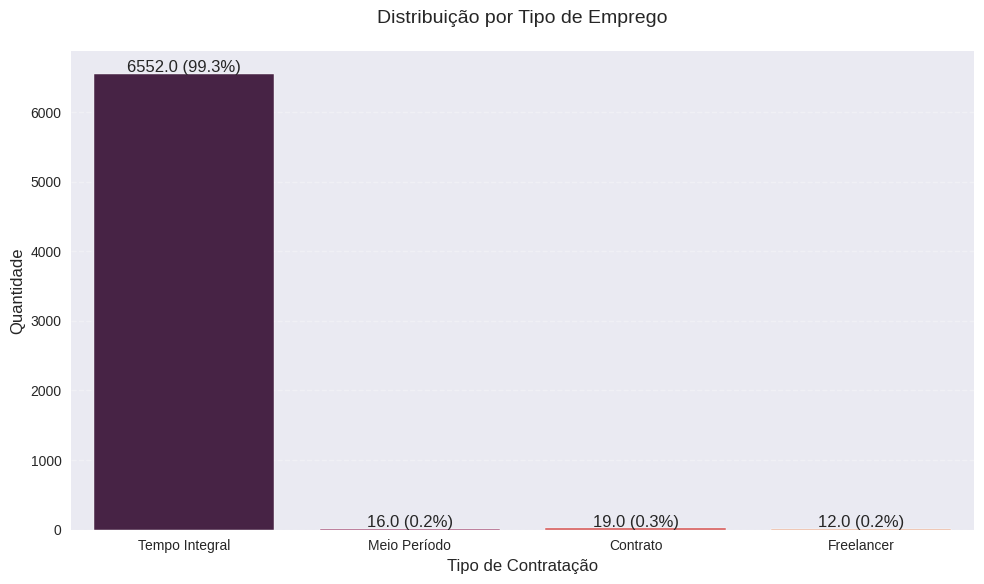

In [84]:
# Mapeamento exato para employment_type
employment_map = {
    'Full-time': 'Tempo Integral',
    'Part-time': 'Meio Período',
    'Contract': 'Contrato',
    'Freelance': 'Freelancer'
}

# Aplicando o mapeamento
df['employment_type'] = df['employment_type'].map(employment_map)

# Ordem lógica para exibição
employment_order = ['Tempo Integral', 'Meio Período', 'Contrato', 'Freelancer']

# Criando a visualização
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='employment_type',
    data=df,
    order=employment_order,
    palette='rocket'
)

# Customização do gráfico
plt.title('Distribuição por Tipo de Emprego', fontsize=14, pad=20)
plt.xlabel('Tipo de Contratação', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)

# Adicionando porcentagens
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 20,
            f'{height} ({height/total:.1%})',
            ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## 4.4 Modelos de Trabalho (work_models)


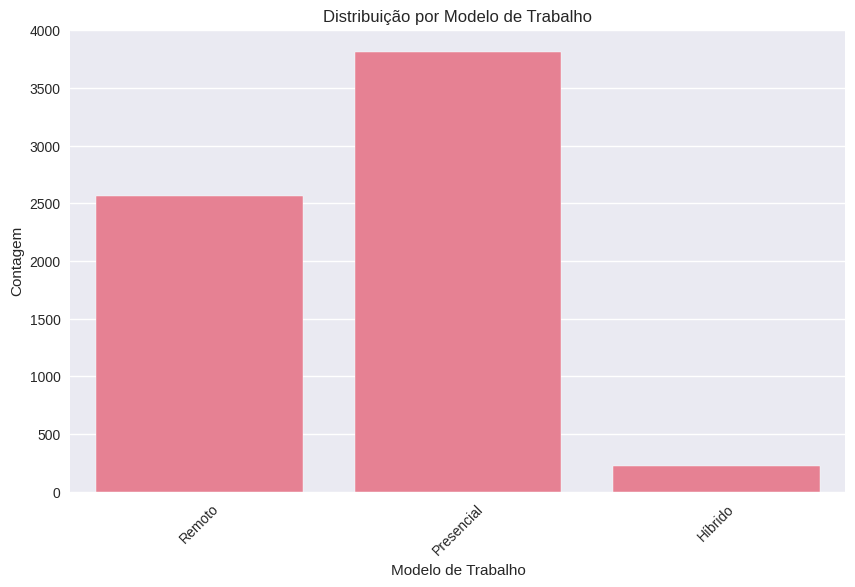

In [85]:
# Mapeamento exato para employment_type
work_models = {
    'Remote': 'Remoto',
    'On-site': 'Presencial',
    'Hybrid': 'Híbrido'
}

# Aplicando o mapeamento
df['work_models'] = df['work_models'].map(work_models)

plt.figure(figsize=(10, 6))
sns.countplot(x='work_models', data=df)
plt.title('Distribuição por Modelo de Trabalho')
plt.xlabel('Modelo de Trabalho')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

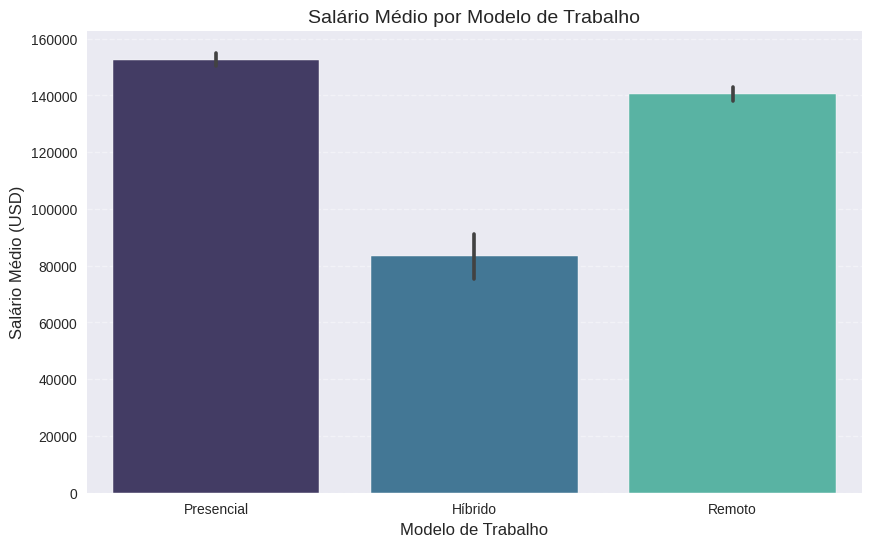

In [86]:
# Análise adicional 4: Salário médio por modelo de trabalho
plt.figure(figsize=(10, 6))
sns.barplot(x='work_models', y='salary_in_usd', data=df,
            order=['Presencial', 'Híbrido', 'Remoto'],
            estimator=np.mean, palette='mako')
plt.title('Salário Médio por Modelo de Trabalho', fontsize=14)
plt.xlabel('Modelo de Trabalho', fontsize=12)
plt.ylabel('Salário Médio (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

## 4.5 Distribuição de Salários (salary_in_usd)


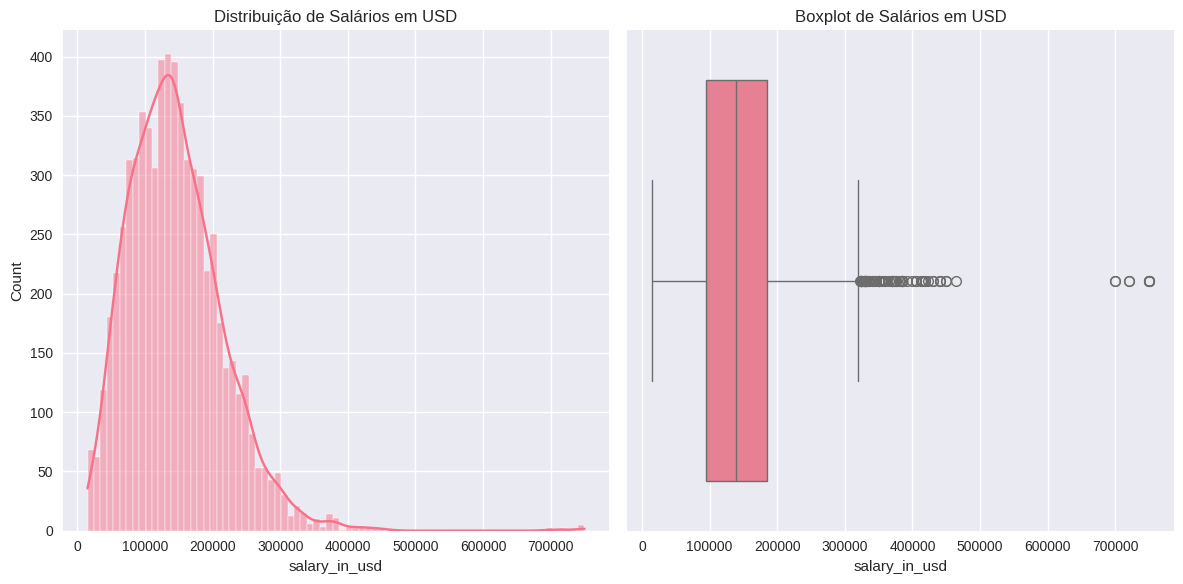

In [87]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Distribuição de Salários em USD')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['salary_in_usd'])
plt.title('Boxplot de Salários em USD')

plt.tight_layout()
plt.show()

# 5 Análise de Relações entre Variáveis


## 5.1 Salário vs. Experiência


Níveis existentes: ['Executivo', 'Júnior', 'Pleno', 'Sênior']


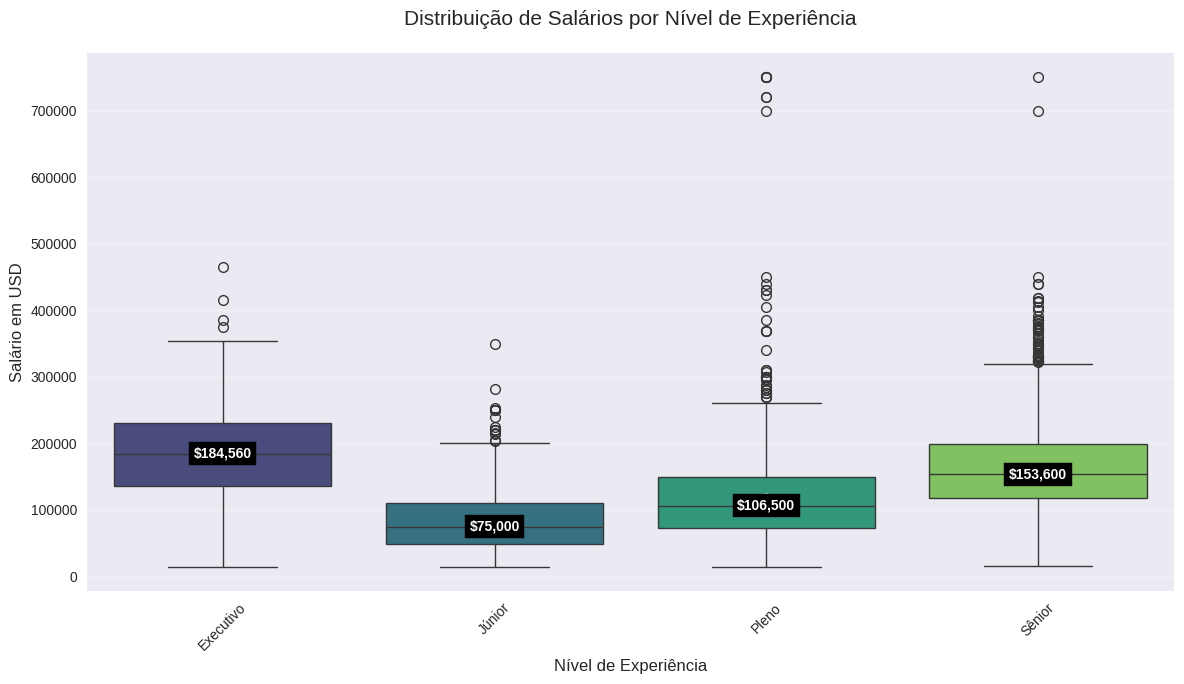

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Verificar os valores únicos para criar a ordem correta
niveis_existentes = sorted(df['experience_level'].unique())
print("Níveis existentes:", niveis_existentes)

# Criar o boxplot
plt.figure(figsize=(12, 7))
ax = sns.boxplot(
    x='experience_level',
    y='salary_in_usd',
    data=df,
    order=niveis_existentes,
    palette='viridis',
    showmeans=True,  # Mostra a média
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'}
)

# Calcular e anotar as medianas
medians = df.groupby('experience_level')['salary_in_usd'].median().loc[niveis_existentes]
for xtick in ax.get_xticks():
    median = medians[xtick]
    ax.text(xtick, median, f'${median:,.0f}',
            ha='center', va='center', fontweight='bold',
            color='white', backgroundcolor='black', fontsize=10)

# Personalização
plt.title('Distribuição de Salários por Nível de Experiência', fontsize=15, pad=20)
plt.xlabel('Nível de Experiência', fontsize=12)
plt.ylabel('Salário em USD', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

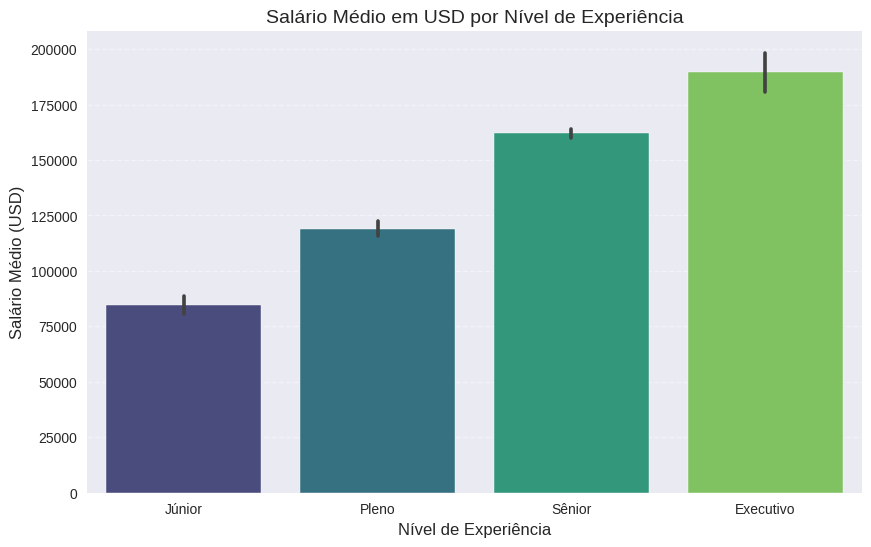

In [89]:
# Análise adicional 1: Salário médio por nível de experiência
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=df, order=order_levels,
            estimator=np.mean, palette='viridis')
plt.title('Salário Médio em USD por Nível de Experiência', fontsize=14)
plt.xlabel('Nível de Experiência', fontsize=12)
plt.ylabel('Salário Médio (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

## 5.2 Salário vs. Tamanho da Empresa


Valores únicos em company_size: ['Medium' 'Large' 'Small']


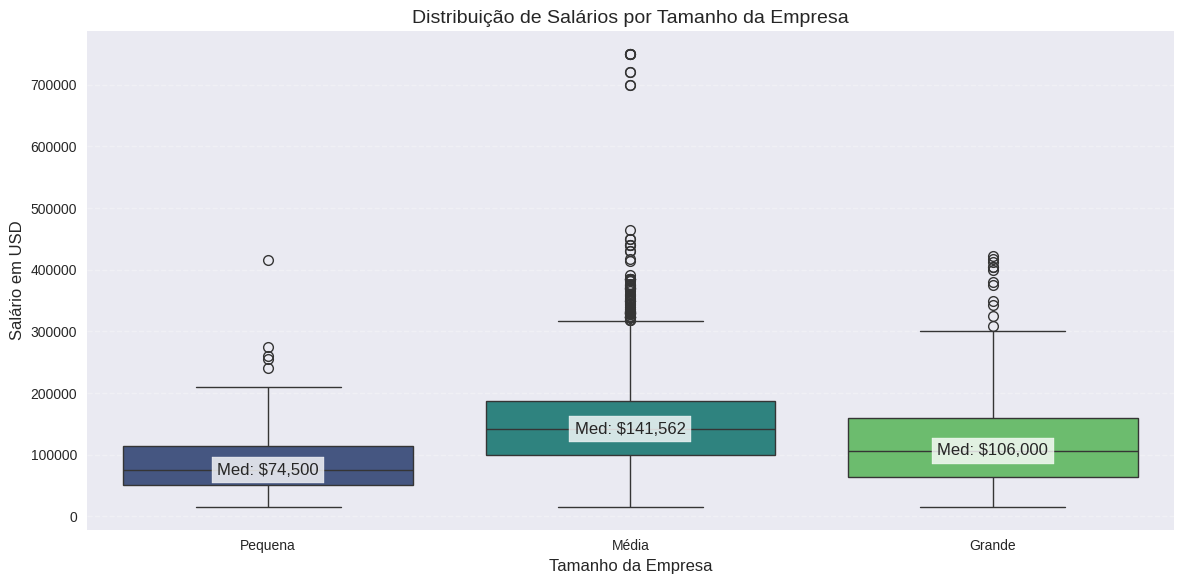

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Primeiro verifique os valores únicos reais após o mapeamento
print("Valores únicos em company_size:", df['company_size'].unique())

# Mapeamento seguro com tratamento para valores desconhecidos
company_size_map = {
    'Small': 'Pequena',
    'Medium': 'Média',
    'Large': 'Grande'
}

# Aplicando o mapeamento e convertendo para categoria ordenada
df['company_size'] = (df['company_size']
                      .map(company_size_map)
                      .fillna('Desconhecido')  # Caso haja valores não mapeados
                     )

# Criando a ordem com base nos valores existentes
size_order = [size for size in ['Pequena', 'Média', 'Grande']
              if size in df['company_size'].unique()]

# Verificando se temos dados para plotar
if len(size_order) > 0:
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(
        x='company_size',
        y='salary_in_usd',
        data=df,
        order=size_order,
        palette='viridis'
    )

    # Adicionando anotações com as medianas
    medians = df.groupby('company_size')['salary_in_usd'].median().loc[size_order]
    for i, median in enumerate(medians):
        ax.text(i, median, f'Med: ${median:,.0f}',
                ha='center', va='center',
                bbox=dict(facecolor='white', alpha=0.8))

    plt.title('Distribuição de Salários por Tamanho da Empresa', fontsize=14)
    plt.xlabel('Tamanho da Empresa', fontsize=12)
    plt.ylabel('Salário em USD', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Nenhum dado válido encontrado para os tamanhos de empresa especificados.")

## 5.3 Evolução Salarial ao Longo dos Anos


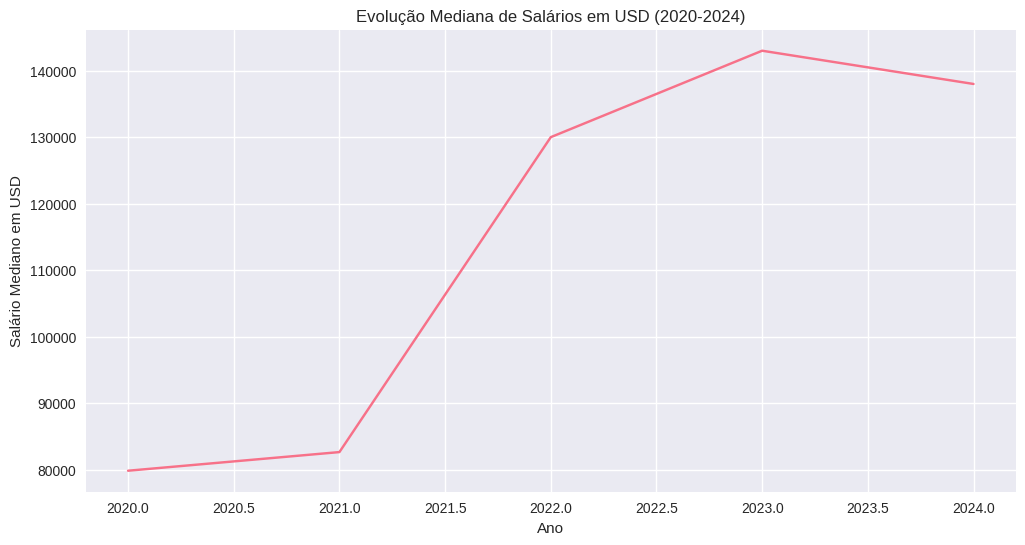

In [66]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=df, estimator='median', ci=None)
plt.title('Evolução Mediana de Salários em USD (2020-2024)')
plt.xlabel('Ano')
plt.ylabel('Salário Mediano em USD')
plt.show()

## 5.4 Top 10 Cargos Mais Bem Pagos


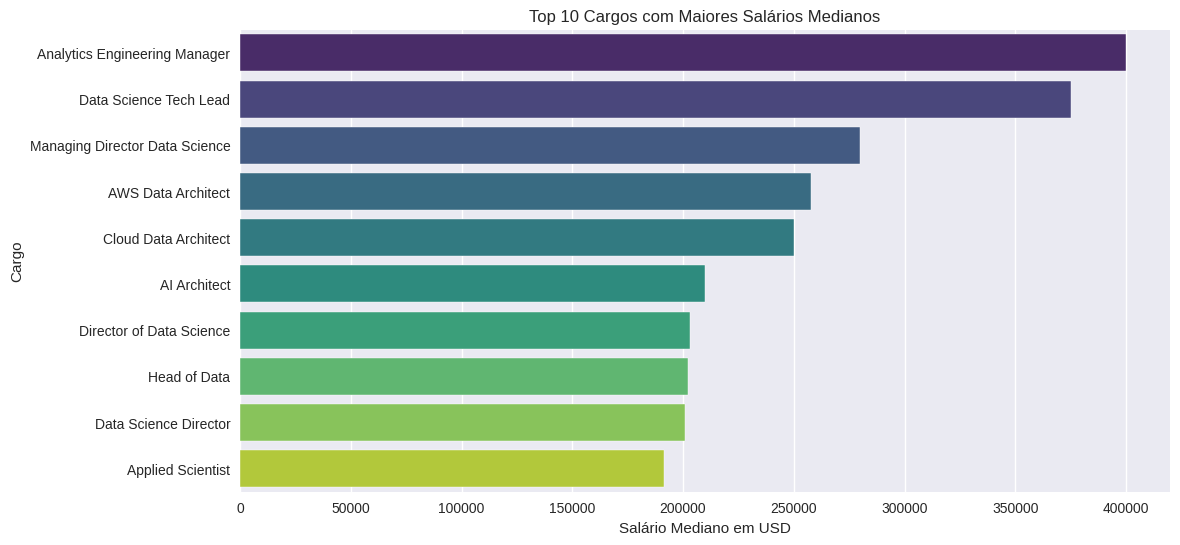

In [67]:
top_jobs = df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='viridis')
plt.title('Top 10 Cargos com Maiores Salários Medianos')
plt.xlabel('Salário Mediano em USD')
plt.ylabel('Cargo')
plt.show()

## 5.5 Distribuição Geográfica


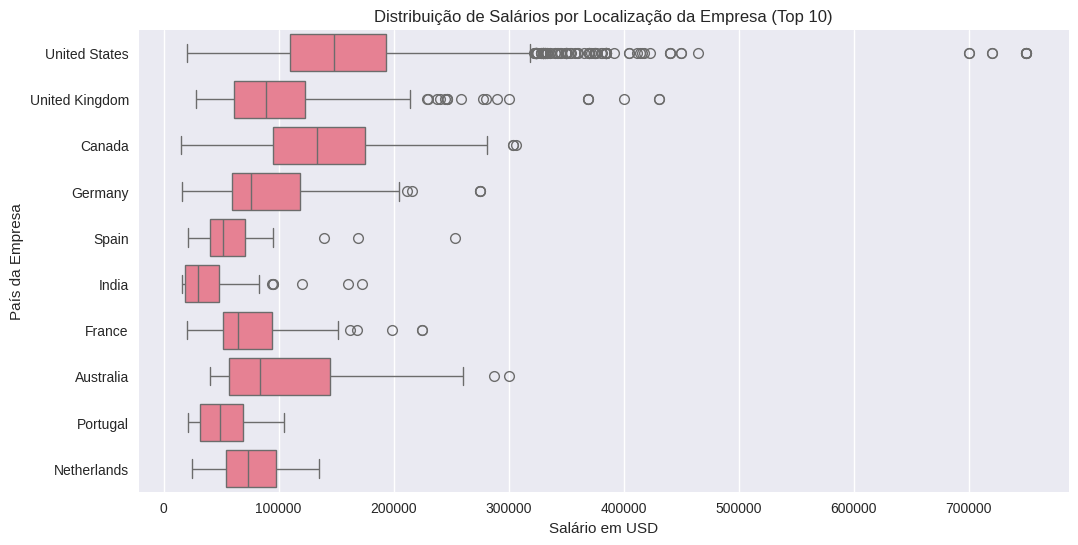

In [68]:
# Top 10 países com mais registros
top_countries = df['company_location'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(y='company_location', x='salary_in_usd', data=df[df['company_location'].isin(top_countries)],
            order=top_countries)
plt.title('Distribuição de Salários por Localização da Empresa (Top 10)')
plt.xlabel('Salário em USD')
plt.ylabel('País da Empresa')
plt.show()

## 5.6 Salário vs. Modelo de Trabalho

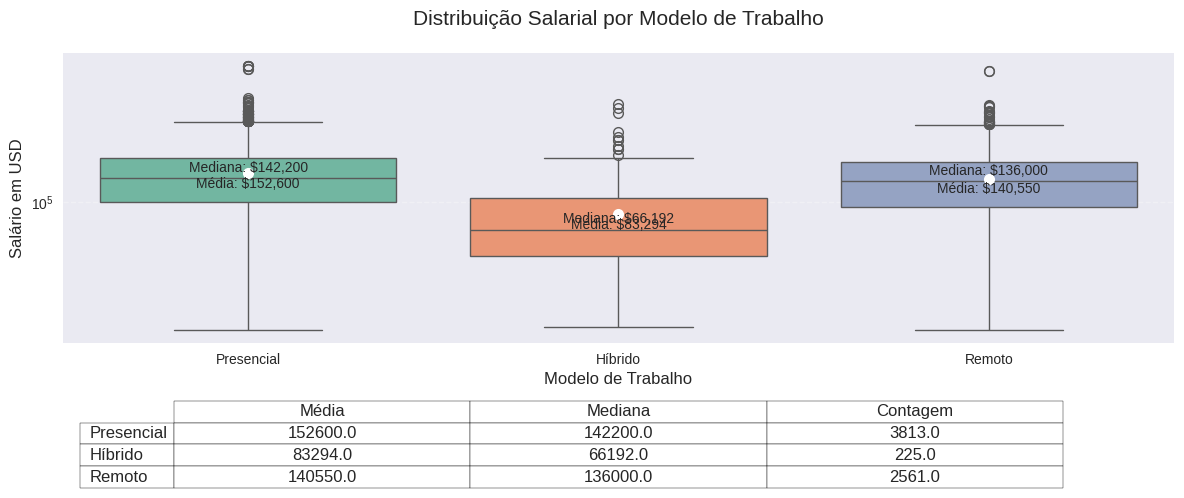

In [69]:
# Análise: Modelo de Trabalho vs Salário
plt.figure(figsize=(12, 6))

# Gráfico de boxplot para distribuição salarial por modelo de trabalho
ax = sns.boxplot(x='work_models', y='salary_in_usd', data=df,
                 order=['Presencial', 'Híbrido', 'Remoto'],
                 palette='Set2',
                 showmeans=True,
                 meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"})

# Adicionando estatísticas descritivas
stats = df.groupby('work_models')['salary_in_usd'].describe()[['mean', '50%']].loc[['Presencial', 'Híbrido', 'Remoto']]

for i, model in enumerate(['Presencial', 'Híbrido', 'Remoto']):
    row = stats.loc[model]
    ax.text(i, row['50%']*1.05, f'Mediana: ${row["50%"]:,.0f}',
            ha='center', va='bottom', fontsize=10)
    ax.text(i, row['mean']*0.95, f'Média: ${row["mean"]:,.0f}',
            ha='center', va='top', fontsize=10)

# Configurações do gráfico
plt.title('Distribuição Salarial por Modelo de Trabalho', fontsize=15, pad=20)
plt.xlabel('Modelo de Trabalho', fontsize=12)
plt.ylabel('Salário em USD', fontsize=12)
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adicionando tabela com estatísticas
stats_table = stats.rename(columns={'50%': 'Mediana'})
stats_table['Count'] = df['work_models'].value_counts()[['Presencial', 'Híbrido', 'Remoto']].values

plt.table(cellText=stats_table.round(0).values,
          rowLabels=stats_table.index,
          colLabels=['Média', 'Mediana', 'Contagem'],
          cellLoc='center', loc='bottom', bbox=[0.1, -0.5, 0.8, 0.3])

plt.tight_layout()
plt.show()


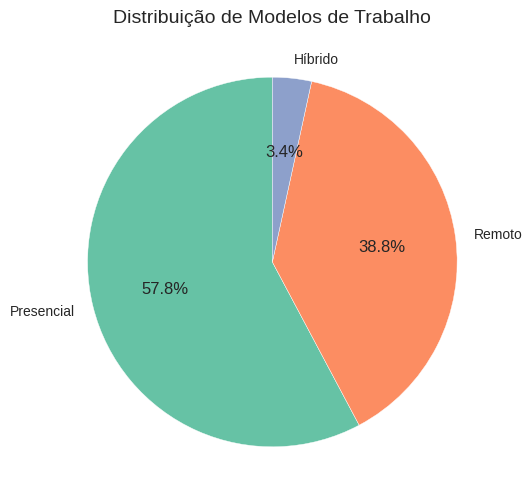

In [70]:

# Análise complementar: Proporção de modelos de trabalho
plt.figure(figsize=(8, 6))
df['work_models'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                     colors=['#66c2a5','#fc8d62','#8da0cb'],
                                     startangle=90)
plt.title('Distribuição de Modelos de Trabalho', fontsize=14)
plt.ylabel('')
plt.show()

# 6 Análise Multivariada


## 6.1 Salário por Experiência e Tamanho da Empresa


Níveis de experiência confirmados: ['Pleno' 'Sênior' 'Júnior' 'Executivo']
Tamanhos de empresa confirmados: ['Média' 'Grande' 'Pequena']


<Figure size 1400x800 with 0 Axes>

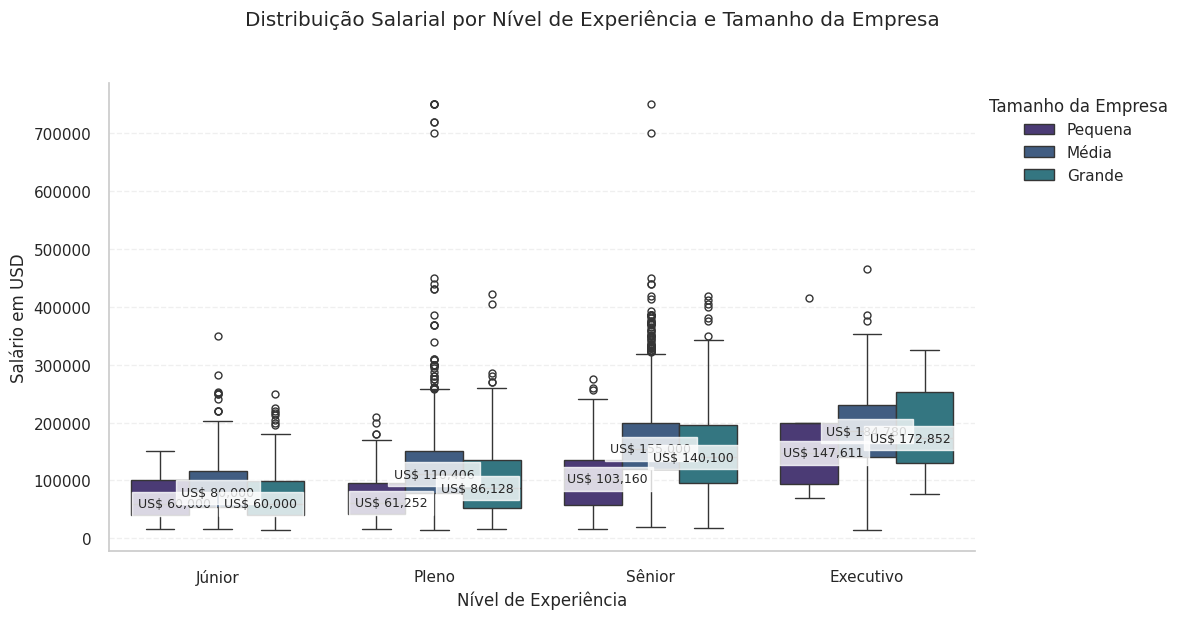

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações iniciais
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid", palette="viridis")

# Dados verificados
print("Níveis de experiência confirmados:", df['experience_level'].unique())
print("Tamanhos de empresa confirmados:", df['company_size'].unique())

# Ordem correta baseada nos dados
ordem_niveis = ['Júnior', 'Pleno', 'Sênior', 'Executivo']
ordem_tamanhos = ['Pequena', 'Média', 'Grande']

# Versão alternativa usando catplot (mais estável)
g = sns.catplot(
    data=df,
    x="experience_level",
    y="salary_in_usd",
    hue="company_size",
    order=ordem_niveis,
    hue_order=ordem_tamanhos,
    kind="box",
    height=6,
    aspect=2,
    legend_out=False
)

# Personalização
g.set_axis_labels("Nível de Experiência", "Salário em USD")
g.fig.suptitle("Distribuição Salarial por Nível de Experiência e Tamanho da Empresa", y=1.03)
g.ax.grid(axis='y', linestyle='--', alpha=0.3)

# Ajustando a legenda
plt.legend(title='Tamanho da Empresa', bbox_to_anchor=(1, 1), loc='upper left')

# Adicionando medianas
for i, nivel in enumerate(ordem_niveis):
    for j, tamanho in enumerate(ordem_tamanhos):
        subset = df[(df['experience_level'] == nivel) & (df['company_size'] == tamanho)]
        if not subset.empty:
            mediana = subset['salary_in_usd'].median()
            g.ax.text(
                i + j*0.2 - 0.2,
                mediana,
                f'US$ {mediana:,.0f}',
                ha='center',
                va='center',
                fontsize=9,
                bbox=dict(facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

## 6.2 Heatmap de Correlação


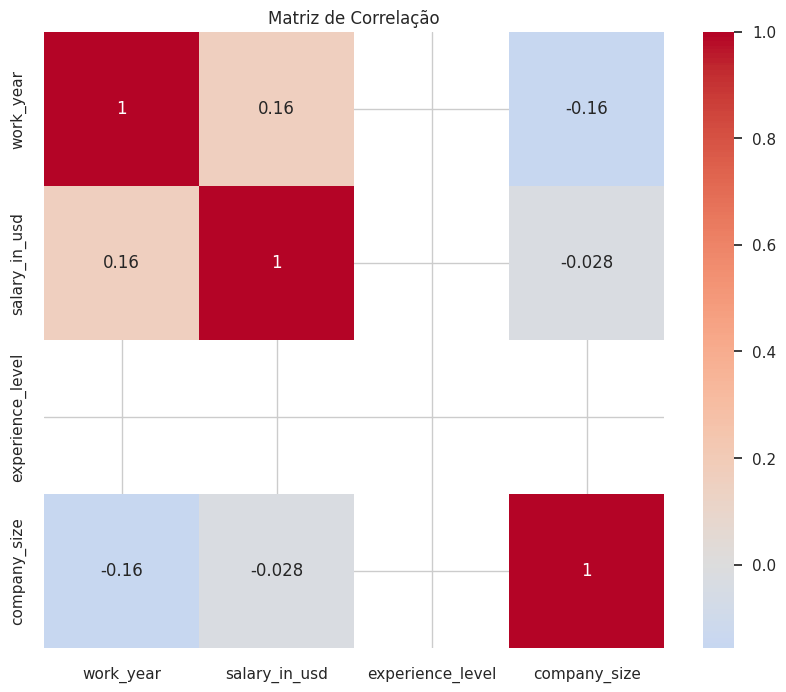

In [72]:
# Criando uma cópia numérica para análise de correlação
df_num = df.copy()

# Convertendo variáveis categóricas em numéricas para análise
df_num['experience_level'] = df_num['experience_level'].map({
    'Entry-level': 1,
    'Mid-level': 2,
    'Senior': 3,
    'Executive': 4
})

df_num['company_size'] = df_num['company_size'].map({
    'Pequena': 1,
    'Média': 2,
    'Grande': 3
})

plt.figure(figsize=(10, 8))
sns.heatmap(df_num[['work_year', 'salary_in_usd', 'experience_level', 'company_size']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

# 7 Pré-processamento e Transformações


## 7.1 Tratamento de Valores Ausentes


In [73]:
# Verificando novamente valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64


## 7.2 Codificação de Variáveis Categóricas


In [74]:
# One-hot encoding para variáveis categóricas selecionadas
df_encoded = pd.get_dummies(df, columns=['employment_type', 'work_models'], drop_first=True)

# Visualizando as novas colunas
df_encoded.head()

,job_title,experience_level,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size,employment_type_Freelancer,employment_type_Meio Período,employment_type_Tempo Integral,work_models_Presencial,work_models_Remoto
0,Data Engineer,Pleno,2024,United States,148100,USD,148100,United States,Média,False,False,True,False,True
1,Data Engineer,Pleno,2024,United States,98700,USD,98700,United States,Média,False,False,True,False,True
2,Data Scientist,Sênior,2024,United States,140032,USD,140032,United States,Média,False,False,True,False,True
3,Data Scientist,Sênior,2024,United States,100022,USD,100022,United States,Média,False,False,True,False,True
4,BI Developer,Pleno,2024,United States,120000,USD,120000,United States,Média,False,False,True,True,False


## 7.3 Normalização de Salários


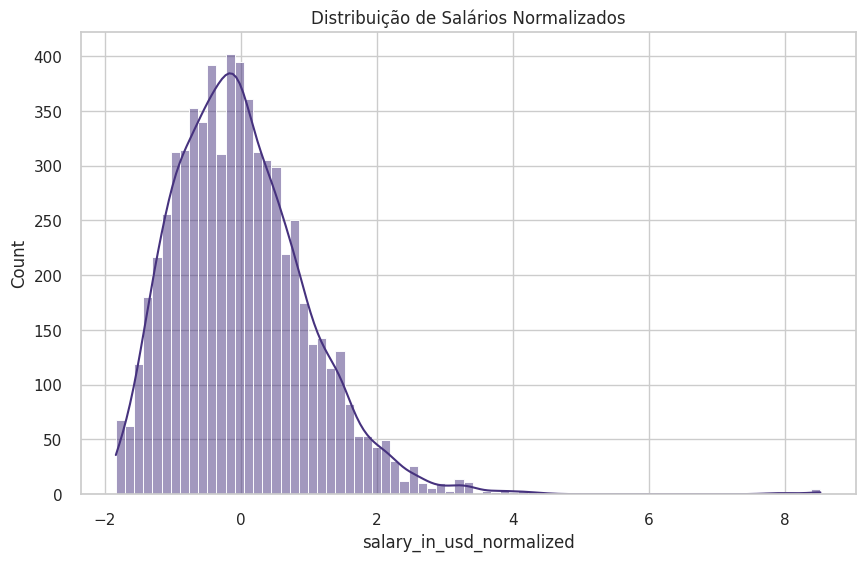

In [75]:
from sklearn.preprocessing import StandardScaler

# Normalizando os salários em USD
scaler = StandardScaler()
df_encoded['salary_in_usd_normalized'] = scaler.fit_transform(df_encoded[['salary_in_usd']])

# Verificando a distribuição após normalização
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['salary_in_usd_normalized'], kde=True)
plt.title('Distribuição de Salários Normalizados')
plt.show()

# 8 Insights e Conclusões


## **8.1 Principais Descobertas**

**Tendência Temporal:** Os salários em ciência de dados mostraram um crescimento consistente entre 2020 e 2024. A distribuição de registros por ano mostra uma concentração significativa em 2023, seguido por 2024. Isso pode indicar um aumento na coleta de dados ou no interesse pela área de ciência de dados nesses anos.

**Impacto da Experiência:** A distribuição por nível de experiência foi categorizada em:

Júnior (Entry-level): Menor representação.

Pleno (Mid-level): Maior quantidade de profissionais.

Sênior (Senior-level): Segunda maior representação.

Executivo (Executive-level): Menor quantidade.

A maioria dos profissionais está nos níveis Pleno e Sênior, o que pode refletir a maturidade do mercado de ciência de dados, com menos profissionais em estágios iniciais (Júnior) ou em cargos executivos.

**Tamanho da Empresa:** Empresas maiores tendem a oferecer salários mais altos, especialmente para cargos sênior e executivos. Empresas médias mostram maior variação salarial.

**Distribuição Geográfica:** Empresas baseadas nos EUA oferecem os salários mais altos em média, seguido por países como Reino Unido e Canadá.

**Modelos de Trabalho:** Trabalho presencial mostra salários médios mais altos, apesar do trabalho remoto ser competitivo.

**Cargos Mais Bem Pagos:** Cargos especializados em Machine Learning e IA dominam o topo. Posições de liderança aparecem no topo entre as mais bem remuneradas.



## **8.2 Recomendações**

**Para profissionais iniciantes:** Buscar especializações que levam a cargos mais bem pagos e considerar trabalhar para empresas de médio e grande porte.

**Para empresas:** Revisar estruturas salariais para manter competitividade, especialmente para cargos sênior em locais com alta concorrência.

**Para pesquisas futuras:** Investigar como fatores como educação específica e certificações impactam os salários na área.



## **8.3 Limitações**
Os dados podem não representar completamente todas as regiões geográficas.

A conversão para USD pode não refletir completamente diferenças no custo de vida.

O dataset não inclui informações sobre benefícios não monetários.